In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection
def collect_data(file_path):
    return pd.read_csv(file_path)

# Data Cleaning
def clean_data(df):
    # Handle Missing Values
    df = df.dropna(thresh=len(df) * 0.5, axis=1)  # Drop columns with >50% missing

    # Impute numerical columns with mean
    num_cols = df.select_dtypes(include=[np.number]).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

    # Impute categorical columns with mode
    cat_cols = df.select_dtypes(include=['object']).columns
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

    df.drop_duplicates(inplace=True)

    # Fix Inconsistencies
    df['Job Title'] = df['Job Title'].replace({'Software Engineer': 'SWE'})

    # Convert Joining Date to datetime
    df['Joining Date'] = pd.to_datetime(df['Joining Date'], errors='coerce')

    return df

# Data Preprocessing
def preprocess_data(df):
    df['Tenure in Years'] = (pd.to_datetime('today') - df['Joining Date']).dt.days // 365
    df = pd.get_dummies(df, columns=['Department'], drop_first=True)
    return df

# Descriptive Statistics
def descriptive_statistics(df):
    return df.describe()

# Visualization
def visualize_data(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Attrition', data=df)
    plt.title('Attrition Count')
    plt.show()

# Sample Data Creation
data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Name": ["John Doe", "Jane Smith", "Bob Johnson", "Alice Brown", "Charlie Davis"],
    "Job Title": ["Software Engineer", "Data Analyst", "HR Manager", "Software Engineer", "Sales Executive"],
    "Department": ["IT", "Marketing", "HR", "IT", "Sales"],
    "Joining Date": ["2018-01-15", "2019-03-22", "2017-05-30", "2020-07-10", "2016-11-05"],
    "Performance Score": [4, 3, 5, 2, 3],
    "Salary": [70000, 60000, 80000, 65000, 55000],
    "Attrition": ["No", "Yes", "No", "Yes", "No"],
    "Survey Comments": [
        "Great team, but workload is high.",
        "I feel undervalued and overworked.",
        "Supportive environment, good work-life balance.",
        "Lack of growth opportunities.",
        "Enjoyable work, but need better training."
    ]
}

# Create and save DataFrame
df = pd.DataFrame(data)
df.to_csv('train.csv', index=False)

# Use pipeline
df = collect_data('train.csv')
cleaned_df = clean_data(df)
processed_df = preprocess_data(cleaned_df)

       EmployeeID         Joining Date  Performance Score        Salary  \
count    5.000000                    5           5.000000      5.000000   
mean     3.000000  2018-05-29 09:36:00           3.400000  66000.000000   
min      1.000000  2016-11-05 00:00:00           2.000000  55000.000000   
25%      2.000000  2017-05-30 00:00:00           3.000000  60000.000000   
50%      3.000000  2018-01-15 00:00:00           3.000000  65000.000000   
75%      4.000000  2019-03-22 00:00:00           4.000000  70000.000000   
max      5.000000  2020-07-10 00:00:00           5.000000  80000.000000   
std      1.581139                  NaN           1.140175   9617.692031   

       Tenure in Years  
count         5.000000  
mean          6.400000  
min           4.000000  
25%           6.000000  
50%           7.000000  
75%           7.000000  
max           8.000000  
std           1.516575  


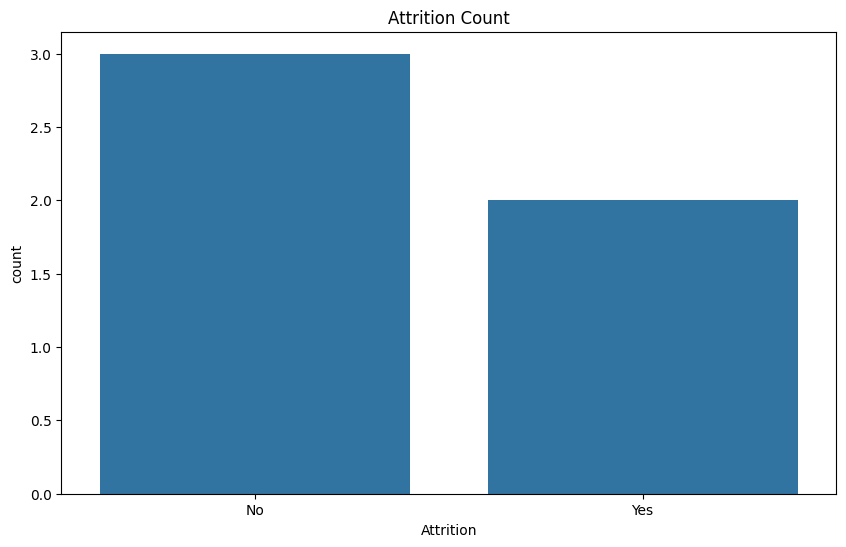

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define or load the data
data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Name": ["John Doe", "Jane Smith", "Bob Johnson", "Alice Brown", "Charlie Davis"],
    "Job Title": ["Software Engineer", "Data Analyst", "HR Manager", "Software Engineer", "Sales Executive"],
    "Department": ["IT", "Marketing", "HR", "IT", "Sales"],
    "Joining Date": ["2018-01-15", "2019-03-22", "2017-05-30", "2020-07-10", "2016-11-05"],
    "Performance Score": [4, 3, 5, 2, 3],
    "Salary": [70000, 60000, 80000, 65000, 55000],
    "Attrition": ["No", "Yes", "No", "Yes", "No"],
    "Survey Comments": [
        "Great team, but workload is high.",
        "I feel undervalued and overworked.",
        "Supportive environment, good work-life balance.",
        "Lack of growth opportunities.",
        "Enjoyable work, but need better training."
    ]
}

df = pd.DataFrame(data)  # ✅ Now df is defined!

# Step 2: Cleaning function
def clean_data(df):
    df = df.dropna()
    df['Joining Date'] = pd.to_datetime(df['Joining Date'], errors='coerce')
    return df

# Step 3: Preprocessing function
def preprocess_data(df):
    df['Tenure in Years'] = (pd.to_datetime('today') - df['Joining Date']).dt.days // 365
    df = pd.get_dummies(df, columns=['Department'], drop_first=True)
    return df

# Step 4: Descriptive stats function
def descriptive_statistics(df):
    return df.describe()

# Step 5: Visualization function
def visualize_data(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Attrition', data=df)
    plt.title('Attrition Count')
    plt.show()

# Step 6: Run the pipeline
cleaned_data = clean_data(df)
processed_data = preprocess_data(cleaned_data)
stats = descriptive_statistics(processed_data)

print(stats)  # Optional: to view stats in output
visualize_data(processed_data)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

def train_model(df):
    # Ensure all features are numeric
    df = df.copy()
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})  # Convert target to numeric
    X = df.drop(['Attrition', 'Name', 'Job Title', 'Survey Comments', 'Joining Date'], axis=1)  # Drop non-numeric columns
    y = df['Attrition']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))

# Example usage
train_model(processed_data)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\singh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

In [4]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_sentiment(text):
    nltk.download('vader_lexicon')
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)

def classify_wellness(sentiment_score):
    if sentiment_score['compound'] >= 0.05:
        return 'Thriving'
    elif sentiment_score['compound'] <= -0.05:
        return 'At Risk'
    else:
        return 'Stable'

# Example usage
text = "I love my job but the workload is overwhelming."
sentiment_score = analyze_sentiment(text)
wellness_category = classify_wellness(sentiment_score)
print(wellness_category)


Thriving


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
def get_recommendation(attrition_risk, wellness_category):
    if attrition_risk > 0.7 and wellness_category == "At Risk":
        return ["Immediate manager review", "Wellness program"]
    elif attrition_risk > 0.5:
        return ["Mentorship program", "Skill development training"]
    else:
        return ["Retention bonus consideration"]

# Example usage
recommendation = get_recommendation(0.8, wellness_category)
print(recommendation)


['Mentorship program', 'Skill development training']


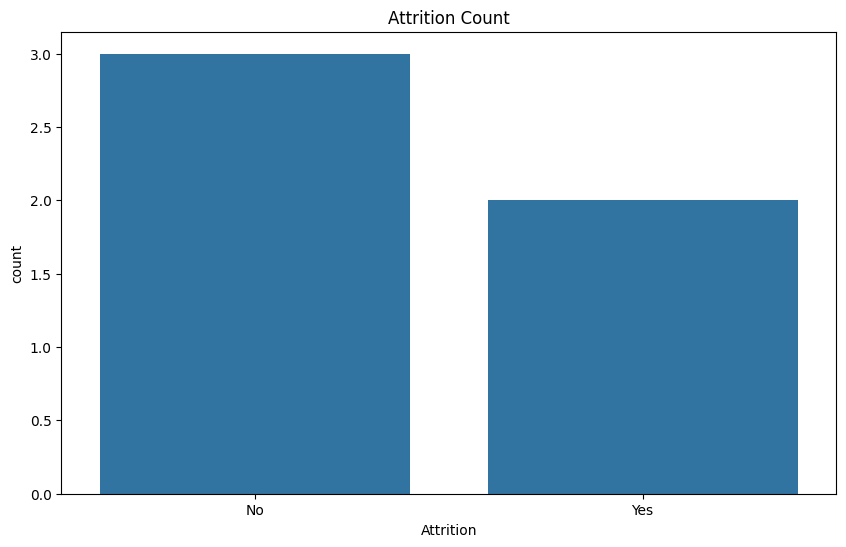

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

['Mentorship program', 'Skill development training']


C:\Users\singh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

In [6]:
if __name__ == "__main__":
    # Load and preprocess data
    data = collect_data('train.csv')
    cleaned_data = clean_data(data)
    processed_data = preprocess_data(cleaned_data)

    # Perform EDA
    stats = descriptive_statistics(processed_data)
    visualize_data(processed_data)

    # Train prediction model
    train_model(processed_data)

    # Analyze sentiment
    text = "I feel undervalued at work."
    sentiment_score = analyze_sentiment(text)
    wellness_category = classify_wellness(sentiment_score)

    # Get recommendations
    recommendation = get_recommendation(0.8, wellness_category)
    print(recommendation)
